In [199]:
# Data Loading
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/mcdonalds.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [200]:
# Convert responses to numeric
df['Like'] = df['Like'].map({'I love it!': 5, '+5': 5, '+4': 4, '+3': 3, '+2': 2, '+1': 1, '0': 0,
                            '-1': -1, '-2': -2, '-3': -3, '-4': -4, '-5': -5, 'I hate it!': -5})

In [201]:
# Feature matrix
X = df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]

In [202]:
# Convert to binary matrix
X = df.iloc[:,1:12].replace({'Yes': 1, 'No': 0})

# Calculate column means
print(X.mean())

convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
Like          1.013817
dtype: float64


In [203]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [204]:
# Check for missing values in X
print(X.isnull().sum())

convenient      0
spicy           0
fattening       0
greasy          0
fast            0
cheap           0
tasty           0
expensive       0
healthy         0
disgusting      0
Like          295
dtype: int64


In [205]:
# Drop rows with missing values
X = X.dropna()

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

In [206]:
# Fit the PCA model
pca = PCA()
pca.fit(X)

# Print the explained variance ratio and components
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.79819608 0.05818645 0.03693084 0.0231801  0.02073929 0.01500051
 0.01176237 0.01150387 0.01035603 0.0080615  0.00608295]
[[-2.13894364e-02  4.29323948e-03  1.81058750e-02  4.83751502e-02
  -8.95289973e-03 -1.81670913e-02 -1.13634199e-01  1.78029547e-02
  -3.32572769e-02  7.38484424e-02 -9.88259363e-01]
 [-3.76553538e-02  9.25540067e-03  6.32483504e-02  1.91992365e-01
  -1.18193745e-01 -6.87726217e-01 -4.86811153e-02  6.68672277e-01
  -7.74587882e-02  1.11017883e-01  5.36710304e-02]
 [-9.12137017e-03 -1.91906452e-02 -2.94432573e-01 -8.60520228e-01
  -3.36621778e-02 -2.13610526e-01 -1.69004037e-02  1.17099608e-01
   2.50020734e-01 -2.12303793e-01 -6.33964326e-02]
 [ 1.90683176e-02  2.46788573e-01 -1.99336580e-01  2.45703936e-01
   2.71887903e-02  2.91307637e-02  6.38873024e-01  1.06350298e-01
   6.40614194e-01  1.11155059e-02 -8.40193120e-02]
 [-7.58609784e-02  6.69707866e-02 -2.95580772e-01  1.46657700e-01
  -8.21172125e-02  7.48517416e-02 -6.77716608e-01 -1.59047920e-02
   5.1234761

In [207]:
# Kmeans
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [208]:
X = pd.DataFrame(X)

In [209]:
# Assess kmeans stability with bootstrapping
n_boot = 100
boot_scores = []
for i in range(n_boot):
    boot_sample = X.sample(len(X), replace=True)
    kmeans = KMeans(n_clusters=4, random_state=i).fit(boot_sample)
    labels_boot = kmeans.labels_
    boot_scores.append(adjusted_rand_score(labels, labels_boot))

print(np.mean(boot_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

-3.654901309126266e-05


In [210]:
# Gaussian mixture model
gmix = mixture.GaussianMixture(n_components=4, random_state=1234).fit(X)
gmix_labels = gmix.predict(X)
print(np.mean(gmix_labels == labels))

0.2979274611398964


In [214]:
# profile clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
gmix = GaussianMixture(n_components=4).fit(pca_result)
gmix_labels = gmix.predict(pca_result)
kmeans = KMeans(n_clusters=4).fit(pca_result)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [217]:
df.shape

(1453, 15)

In [218]:
len(labels)

1158

In [219]:
len(pca_result)

1158

ValueError: Item wrong length 1158 instead of 1453.

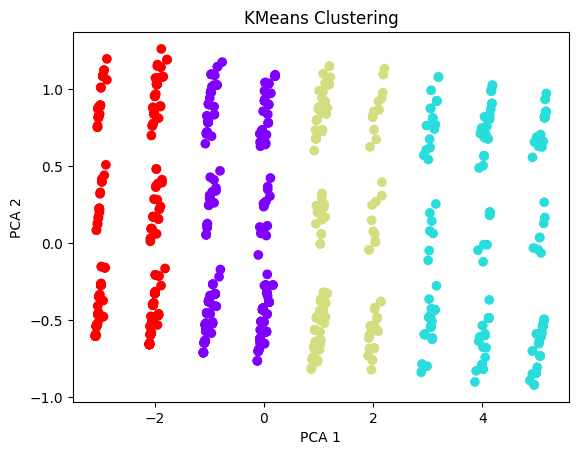

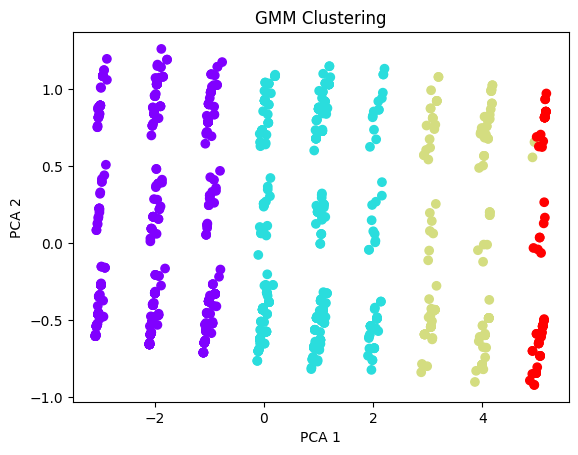

<Figure size 640x480 with 0 Axes>

In [220]:
# Visualize clusters
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering')

plt.figure()
plt.scatter(pca_result[:,0], pca_result[:,1], c=gmix_labels, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('GMM Clustering')

plt.figure()
plt.boxplot([df[labels==i]['Like'] for i in range(len(labels))])
plt.xticks(range(1,5))
plt.ylabel('Like Score')
plt.title('Like Score by KMeans Cluster')

plt.figure()
plt.boxplot([df[gmix_labels==i]['Like'] for i in range(len(gmix_labels))])
plt.xticks(range(1,5))
plt.ylabel('Like Score')
plt.title('Like Score by GMM Cluster')